In [1]:
import multiprocessing as mp

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from typing import List, Dict, NoReturn, Any, Callable, Union, Optional
import copy
import gc
import multiprocessing as mp

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)

In [4]:
def time_indexed_df(df1: pd.core.frame.DataFrame, columname: str) -> pd.core.frame.DataFrame:
    """ 
        Cast into a time-indexed dataframe.
        df1 paramater should have a column containing datetime-like data,
        which contains entries of type pandas._libs.tslibs.timestamps.Timestamp
        or a string containing a compatible datetime (i.e. pd.to_datetime)
    """
    
    _tmp = df1.copy()
    
    pool = mp.Pool()
    _tmp[columname] = pool.map(pd.to_datetime, _tmp[columname])
    pool.close()
    pool.terminate()
    
    _tmp.index = _tmp[columname]
    _tmp.drop(columname, axis=1, inplace=True)
    _tmp = _tmp.sort_index()
    
    return _tmp
##

In [22]:
x = pd.read_csv('data/CareLink-Export-03-ene-2020.csv')
x["DateTime"] =  x["Date"] + " " + x["Time"]
x.drop(["Date", "Time"], axis=1, inplace=True)

/usr/local/anaconda3/envs/diab/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,8,9,10,13,14,16,17,18,34,37,39,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
y = time_indexed_df(x, 'DateTime')

In [24]:
y = y.loc['2019-10-17':, :]

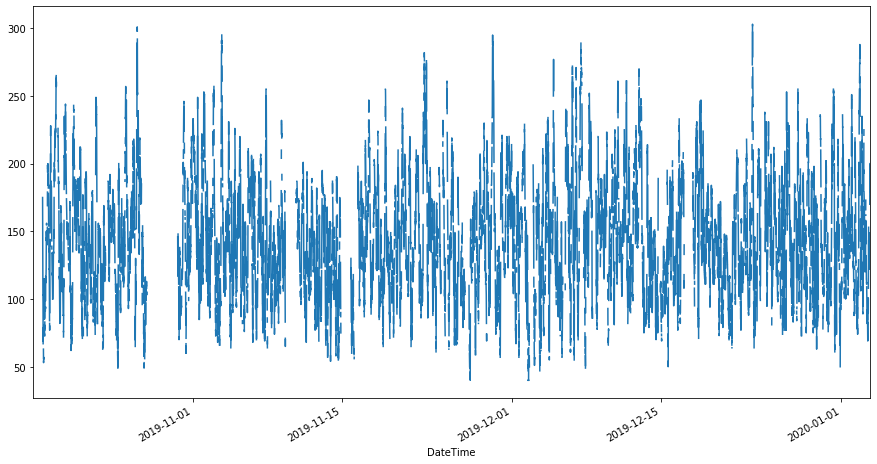

In [25]:
y['Sensor Glucose (mg/dL)'].plot()

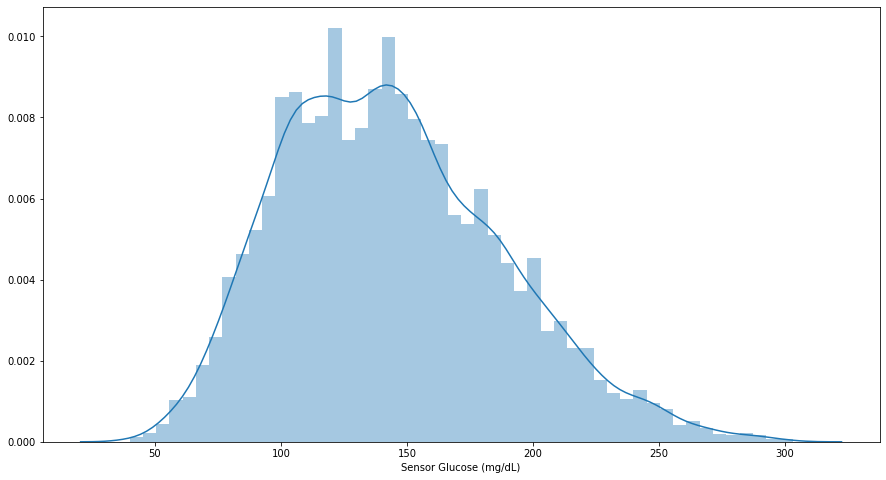

In [26]:
sns.distplot(y['Sensor Glucose (mg/dL)'].dropna())

In [27]:
hourly_mean = y['Sensor Glucose (mg/dL)'].groupby(y.index.hour).mean()
hourly_std  = y['Sensor Glucose (mg/dL)'].groupby(y.index.hour).std()

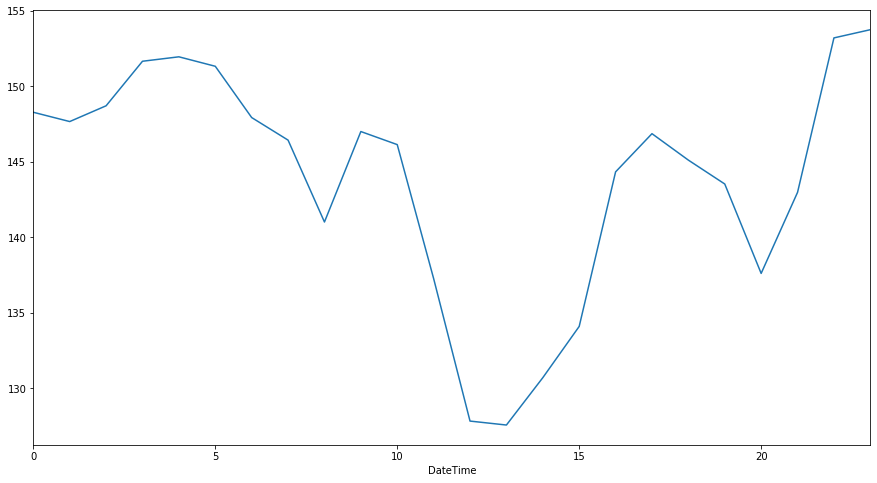

In [28]:
hourly_mean.plot()

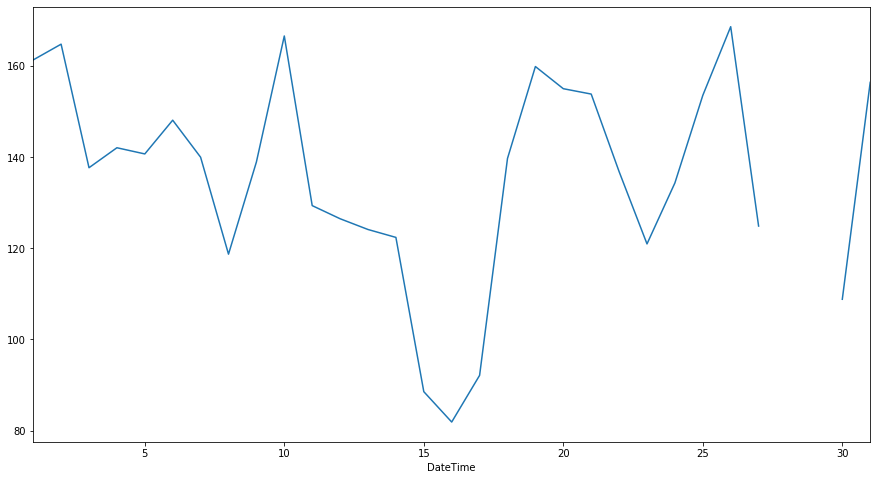

In [13]:
y['Sensor Glucose (mg/dL)'].groupby(y.index.day).mean().plot()

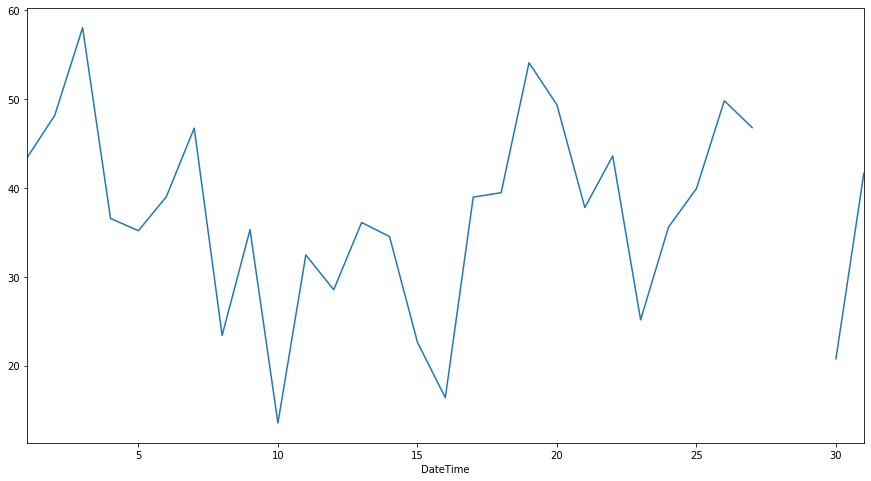

In [14]:
y['Sensor Glucose (mg/dL)'].groupby(y.index.day).std().plot()

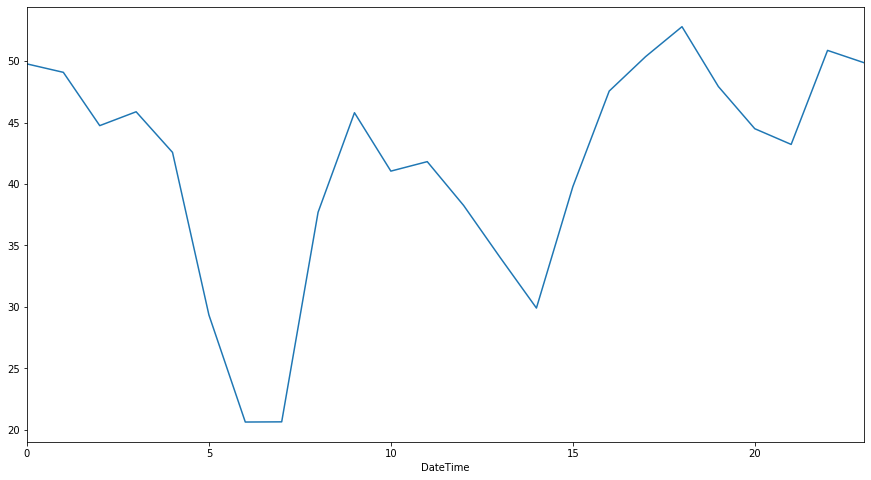

In [15]:
y['Sensor Glucose (mg/dL)'].groupby(y.index.hour).std().plot()

In [16]:
hourly_std.apply(lambda x: x/hourly_std.shape[0])

DateTime
0     2.073550
1     2.044991
2     1.864391
3     1.911366
4     1.773769
5     1.222983
6     0.860092
7     0.860734
8     1.570875
9     1.908137
10    1.710272
11    1.742381
12    1.593854
13    1.418132
14    1.246334
15    1.657384
16    1.981485
17    2.098222
18    2.199657
19    1.996871
20    1.853964
21    1.800740
22    2.119320
23    2.077687
Name: Sensor Glucose (mg/dL), dtype: float64

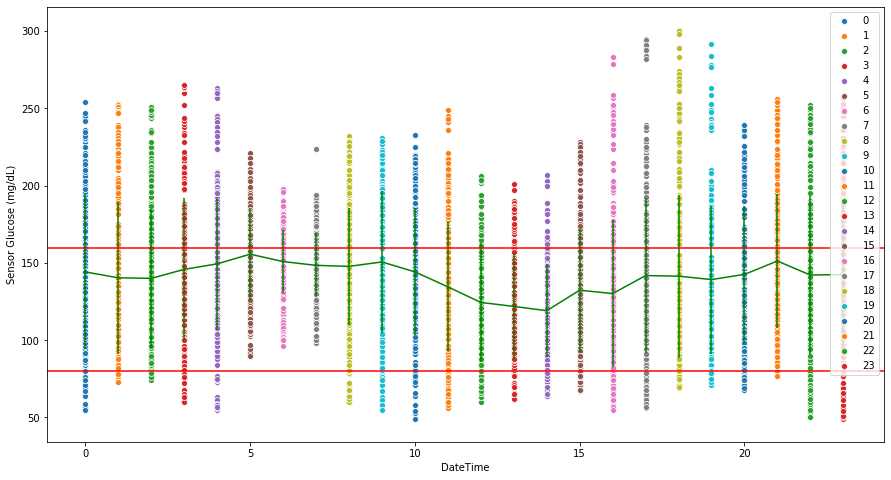

In [17]:
by_hour = y['Sensor Glucose (mg/dL)'].groupby(y.index.hour)
for i in by_hour:
    sns.scatterplot(i[1].dropna().index.hour, i[1].dropna(), label=f"{i[0]}")
    
plt.errorbar(
    hourly_mean.index, 
    hourly_mean.to_list(), 
    yerr=hourly_std.apply(lambda x: x).to_list(),
    c='green'
)

plt.axhline(160, c='red')
plt.axhline(80, c='red')

In [18]:
z = y['Sensor Glucose (mg/dL)'].groupby(y.index.hour)

In [19]:
for i in z:
    pass
    #sns.scatterplot(i[1].dropna().index.hour, i[1].dropna())
    #print(i[1].dropna())
    #plt.figure()
    #plt.title(f"Hour {i[0]}")
    #sns.distplot(i[1].dropna())

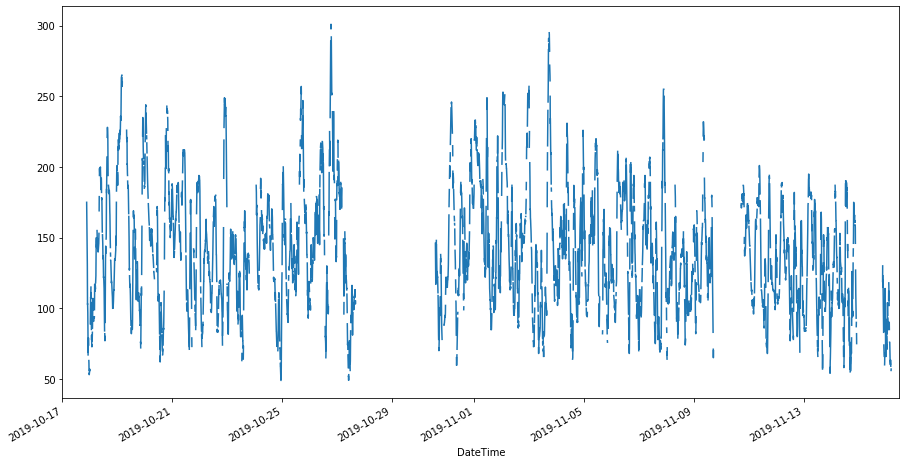

In [20]:
y['Sensor Glucose (mg/dL)'].plot()

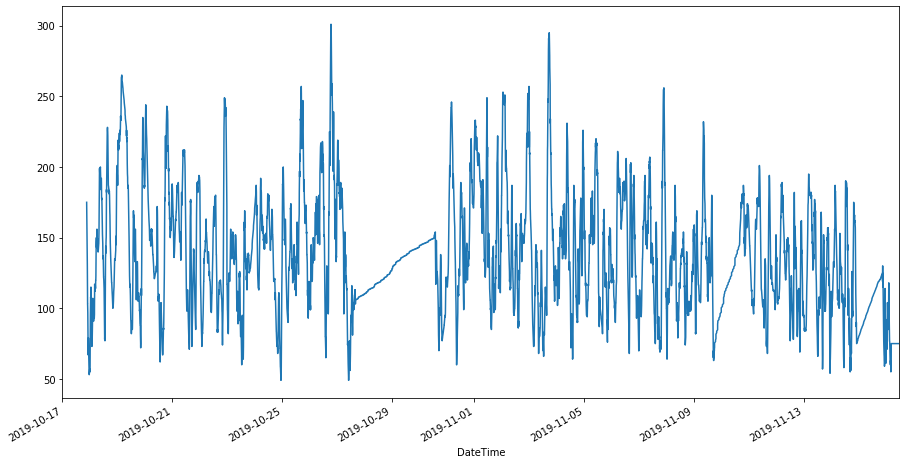

In [21]:
y['Sensor Glucose (mg/dL)'].interpolate().plot()

In [161]:
df = y['Sensor Glucose (mg/dL)']
df[np.bitwise_not(df.index.duplicated())]

DateTime
2019-10-17 00:00:00   NaN
2019-10-17 01:00:00   NaN
2019-10-17 01:11:00   NaN
2019-10-17 01:12:00   NaN
2019-10-17 02:00:00   NaN
                       ..
2019-11-16 10:50:46   NaN
2019-11-16 11:00:00   NaN
2019-11-16 11:09:43   NaN
2019-11-16 11:14:00   NaN
2019-11-16 11:46:13   NaN
Name: Sensor Glucose (mg/dL), Length: 9416, dtype: float64

In [174]:
time_series = y['Sensor Glucose (mg/dL)']
time_series =  time_series[~df.index.duplicated()].interpolate()
print(time_series.dropna().head(), '\n\n', y['Sensor Glucose (mg/dL)'].dropna())
#time_series.plot()
#decomp = seasonal_decompose(time_series)

DateTime
2019-10-17 21:15:55    169.0
2019-10-17 21:20:55    164.0
2019-10-17 21:25:55    158.0
2019-10-17 21:30:55    152.0
2019-10-17 21:35:55    143.0
Name: Sensor Glucose (mg/dL), dtype: float64 

 DateTime
2019-10-17 21:10:55    175.0
2019-10-17 21:15:55    169.0
2019-10-17 21:20:55    164.0
2019-10-17 21:25:55    158.0
2019-10-17 21:30:55    152.0
                       ...  
2019-11-16 04:17:47     55.0
2019-11-16 04:22:47     58.0
2019-11-16 04:27:47     56.0
2019-11-16 04:32:47     57.0
2019-11-16 04:37:47     75.0
Name: Sensor Glucose (mg/dL), Length: 6800, dtype: float64


In [148]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, freq=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages
    
    Parameters
    ----------
    x : array-like
        Time series. If 2d, individual series are in columns.
    model : str {"additive", "multiplicative"}
        Type of seasonal component. Abbreviations are accepted.
    filt : array-like
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by two_sided.
    freq : int, optional
        Frequency of the series. Must be used if x is not a pandas object.
        Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
    two_sided : bool
        The moving average method used in filtering.
        If True (default), a centered moving average is computed using the filt.
        If F